## Universidad del Valle de Guatemala
### Data Science
#### Juan Marroquin 19845
#### Carlos Raxtum 19721

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#### PRIMEROS 3 EJERCICIOS EN EL NOTEBOOK getInfo.ipynb

In [2]:
df = pd.read_csv('covid19.csv',encoding='utf-8')

##### drop subregion column

In [3]:
df = df.drop(['subregion'], axis=1)

#### Analisis Exploratorio

In [4]:
df.head()

,country,date,lat,long,confirmed,death,recovered
0,Afghanistan,2020-01-22,33.93911,67.709953,0,0,0.0
1,Afghanistan,2020-01-23,33.93911,67.709953,0,0,0.0
2,Afghanistan,2020-01-24,33.93911,67.709953,0,0,0.0
3,Afghanistan,2020-01-25,33.93911,67.709953,0,0,0.0
4,Afghanistan,2020-01-26,33.93911,67.709953,0,0,0.0


##### Shape of dataframe

In [5]:
df.shape

(286977, 7)

##### Describe df

In [6]:
df.describe()

,lat,long,confirmed,death,recovered
count,284991.000000,284991.000000,2.869770e+05,2.869770e+05,2.710890e+05
mean,19.718719,22.182084,7.623394e+05,1.189202e+04,8.568111e+04
std,25.911394,77.735286,4.096779e+06,5.841977e+04,7.553919e+05
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00,-1.000000e+00
25%,3.933900,-42.604300,4.120000e+02,2.000000e+00,0.000000e+00
50%,21.512583,20.939400,9.980000e+03,1.130000e+02,0.000000e+00
75%,40.463667,90.356300,1.693960e+05,2.451000e+03,1.707000e+03
max,71.706900,178.065000,9.672111e+07,1.062681e+06,3.097475e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286977 entries, 0 to 286976
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    286977 non-null  object 
 1   date       286977 non-null  object 
 2   lat        284991 non-null  float64
 3   long       284991 non-null  float64
 4   confirmed  286977 non-null  int64  
 5   death      286977 non-null  int64  
 6   recovered  271089 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 15.3+ MB


In [8]:
# replace nan in recoverd column with 0
# we asume a Nan values means that nobody was recoverd from covid that day
df['recovered']=df['recovered'].fillna(0)

In [9]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [10]:
# remove from the country columns
remove_country = ['Diamond Princess','Winter Olympics 2022','MS Zaandam','Summer Olympics 2020']
for fake in remove_country:
    df = df.drop(df[df.country == fake ].index)
    df.reset_index(drop=True)

#### Null values in dataset

[Text(0.5, 1.0, 'Null values in dataset')]

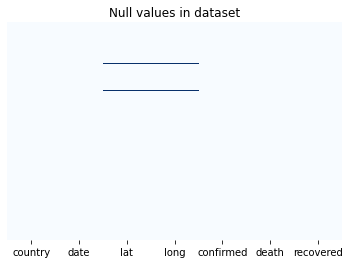

In [11]:
figure = sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
figure.set(title = "Null values in dataset")

In [12]:
df.isnull().sum()

country         0
date            0
lat          1986
long         1986
confirmed       0
death           0
recovered       0
dtype: int64

##### Get what Countries does not have lat and long values

In [13]:
df[df.lat.isnull()].country.unique()

array(['Canada', 'China'], dtype=object)

In [14]:
coutries_lat_long = {
    'Canada': {
        'lat': 45.424721,
        'long':-75.695000
    },
    'China': {
        'lat':39.916668,
        'long':116.383331
    },
}

In [15]:
coutries_lat_long['Canada']

{'lat': 45.424721, 'long': -75.695}

##### Replace the Nan values

In [16]:
for country_fix in coutries_lat_long:
    df.loc[df["country"] == country_fix, "lat"] = coutries_lat_long[country_fix]['lat']
    df.loc[df["country"] == country_fix, "long"] = coutries_lat_long[country_fix]['long']

## After cleaning the data get the new statistics 

In [17]:
df.describe()

,lat,long,confirmed,death,recovered
count,283005.000000,283005.000000,2.830050e+05,2.830050e+05,2.830050e+05
mean,20.608889,22.349650,7.730346e+05,1.205887e+04,8.207228e+04
std,25.878030,77.613372,4.124427e+06,5.881121e+04,7.395182e+05
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00,-1.000000e+00
25%,4.860416,-55.765800,4.540000e+02,3.000000e+00,0.000000e+00
50%,23.424076,20.939400,1.083600e+04,1.210000e+02,0.000000e+00
75%,40.143100,90.433600,1.783780e+05,2.555000e+03,1.357000e+03
max,71.706900,178.065000,9.672111e+07,1.062681e+06,3.097475e+07


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283005 entries, 0 to 286976
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    283005 non-null  object 
 1   date       283005 non-null  object 
 2   lat        283005 non-null  float64
 3   long       283005 non-null  float64
 4   confirmed  283005 non-null  int64  
 5   death      283005 non-null  int64  
 6   recovered  283005 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 17.3+ MB


#### Null values in dataset

[Text(0.5, 1.0, 'Null values in dataset')]

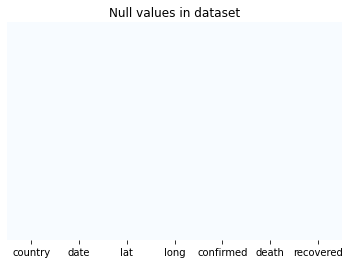

In [19]:
figure = sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
figure.set(title = "Null values in dataset")

#### Some graphs 

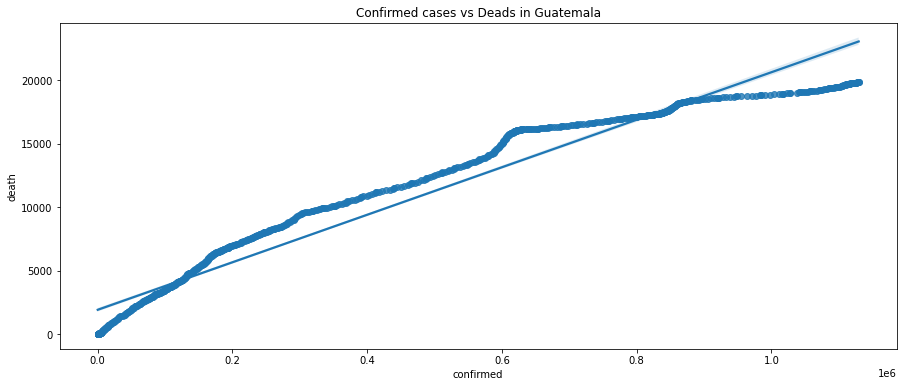

In [20]:
plt.figure(figsize = (15, 6))
figure = sns.regplot(x = 'confirmed', y = 'death', data = df[df.country == 'Guatemala' ])
figure.set(title = "Confirmed cases vs Deads in Guatemala")
plt.show()

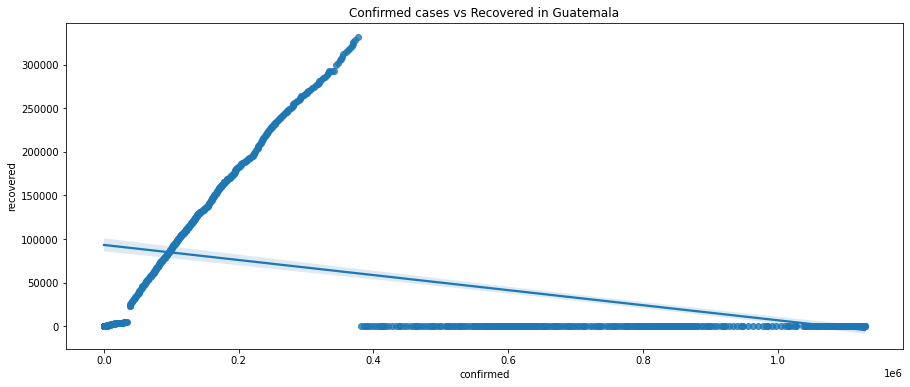

In [21]:
plt.figure(figsize = (15, 6))
figure = sns.regplot(x = 'confirmed', y = 'recovered', data = df[df.country == 'Guatemala' ])
figure.set(title = "Confirmed cases vs Recovered in Guatemala")
plt.show()

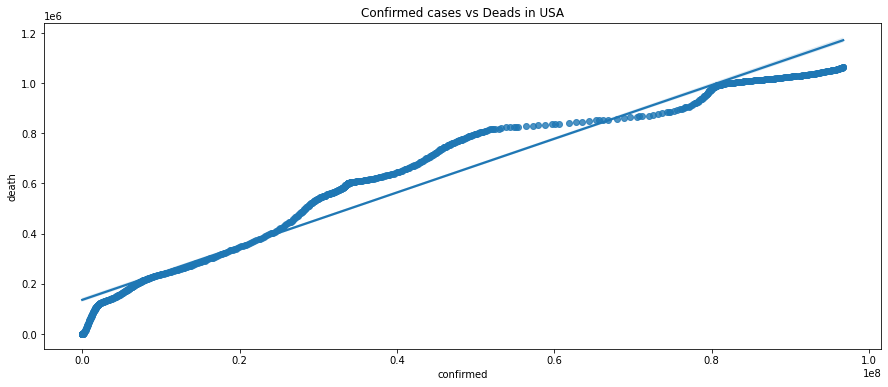

In [25]:
plt.figure(figsize = (15, 6))
figure = sns.regplot(x = 'confirmed', y = 'death', data = df[df.country == 'US' ])
figure.set(title = "Confirmed cases vs Deads in USA")
plt.show()

[Text(0.5, 1.0, 'Confirmed cases vs Recovered in USA')]

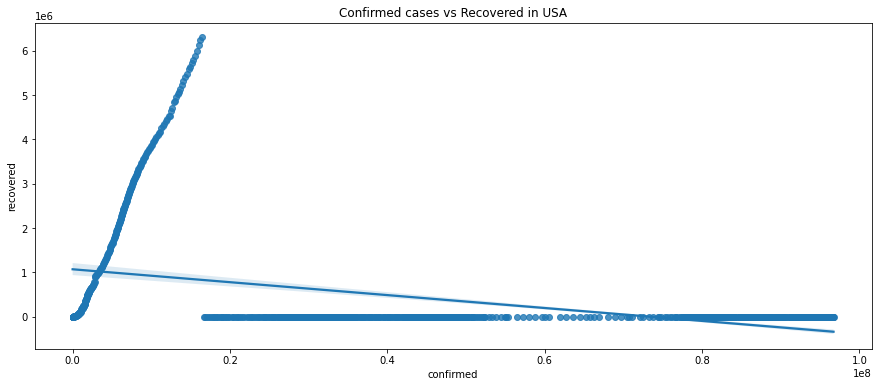

In [23]:
plt.figure(figsize = (15, 6))
figure = sns.regplot(x = 'confirmed', y = 'recovered', data = df[df.country == 'US' ])
figure.set(title = "Confirmed cases vs Recovered in USA")